# Group 16 Milestone 1

In [8]:
import os
import os.path
import zipfile
import requests
import json
import pandas as pd
from urllib.request import urlretrieve
import glob
import re
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Necessary metadata
url = "https://api.figshare.com/v2/articles/14096681"
headers = {"Content-Type": "application/json"}
output_directory = "../data/"
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)
files = data["files"]

In [15]:
%%time
files_to_dl = "data.zip"
if not os.path.isfile(output_directory + files_to_dl):
    for file in files:
        if file["name"] == files_to_dl:
            os.makedirs(output_directory, exist_ok=True)
            urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, files_to_dl), "r") as f:
    f.extractall(output_directory)
os.remove("../data/observed_daily_rainfall_SYD.csv")

CPU times: total: 23 s
Wall time: 26.5 s


In [18]:
%%time
files = glob.glob("../data/*.csv")
columns = ["time", "lat_min", "lat_max", "lon_min", "lon_max", "rain (mm/day)"]
df = pd.concat((pd.read_csv(file, index_col=0, usecols=columns)
                .assign(model=re.findall(r"[^\/]+(?=\_daily)", file)[0])
                for file in files)
              )

CPU times: total: 1min 10s
Wall time: 1min 18s


In [19]:
df

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-36.250000,-35.00000,140.625,142.500,3.293256e-13,data\ACCESS-CM2
1889-01-02 12:00:00,-36.250000,-35.00000,140.625,142.500,0.000000e+00,data\ACCESS-CM2
1889-01-03 12:00:00,-36.250000,-35.00000,140.625,142.500,0.000000e+00,data\ACCESS-CM2
1889-01-04 12:00:00,-36.250000,-35.00000,140.625,142.500,0.000000e+00,data\ACCESS-CM2
1889-01-05 12:00:00,-36.250000,-35.00000,140.625,142.500,1.047658e-02,data\ACCESS-CM2
...,...,...,...,...,...,...
2014-12-27 12:00:00,-30.157068,-29.21466,153.125,154.375,5.543748e-01,data\TaiESM1
2014-12-28 12:00:00,-30.157068,-29.21466,153.125,154.375,7.028577e+00,data\TaiESM1
2014-12-29 12:00:00,-30.157068,-29.21466,153.125,154.375,2.347570e-01,data\TaiESM1


## Runtimes of CSV compilation


| Team Member | OS           | RAM | Processor        | Is SSD | Wall Time Taken |
|-------------|--------------|-----|------------------|--------|-----------------|
| Nikita      | Windows 10 | 16GB | 4th Gen Core i7  | Yes    | 1min 21s        |
| Margot      | Windows 10   | 12GB | 10th Gen-Core i7 | Yes |    1min 9s     |
| Thea Wenxin | MacOS Monterey|  16GB  |   Apple M1 chip |  Yes|  45.1s |
| Kiran       | MacOS Big Sur |   8GB  |   Apple M1 chip | Yes |     1min 40s         |

## EDA for Python

### Combine Data into a Single CSV Using Python Pandas.

In [20]:
%%time
df.to_csv(os.path.join(output_directory, "combined_csv.csv"))

CPU times: total: 7min 41s
Wall time: 7min 48s


### Load Combined CSV File into Memory and Perform EDA

In [21]:
%%time
df_baseline = pd.read_csv(os.path.join(output_directory, "combined_csv.csv"), parse_dates=True)

CPU times: total: 1min 20s
Wall time: 1min 25s


#### EDA

#### Structure of the Data

In [22]:
# check dtype and memory usage
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62467843 entries, 0 to 62467842
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   lat_min        float64
 2   lat_max        float64
 3   lon_min        float64
 4   lon_max        float64
 5   rain (mm/day)  float64
 6   model          object 
dtypes: float64(5), object(2)
memory usage: 3.3+ GB


In [10]:
df_baseline.head()

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1,1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
2,1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
3,1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
4,1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


#### Summary Statistics For Each Numeric Columns

In [11]:
%%time
df_baseline.describe()

CPU times: total: 17.1 s
Wall time: 17.8 s


,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,5.924854e+07,6.246784e+07,5.924854e+07,6.246784e+07,5.924854e+07
mean,-3.310482e+01,-3.197757e+01,1.469059e+02,1.482150e+02,1.901170e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.585735e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.838413e-06
50%,-3.300000e+01,-3.204188e+01,1.468750e+02,1.481250e+02,6.154947e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.020918e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


#### Counts of a Numeric Column

In [12]:
%%time
df_baseline['lat_min'].value_counts()

CPU times: total: 875 ms
Wall time: 923 ms


-34.869110    3035329
-32.984293    3035329
-32.041885    3035329
-31.099476    3035329
-30.000000    1747830
               ...   
-30.700015     183960
-30.696652     183960
-33.487232     183960
-36.277805     183960
-36.281964     183960
Name: lat_min, Length: 84, dtype: int64

#### Histogram Showing the Counts of Minimum Latitude

(array([2070450., 6347269., 1610490.,  966420., 4691449., 2806470.,
         644070., 4185079., 4509420.,  367920., 4921129.,  644280.,
        2806530., 4921339., 1610700., 2484330., 3955129., 1748520.,
        2070210., 5887339.]),
 array([-36.46738961, -36.13902013, -35.81065065, -35.48228117,
        -35.15391169, -34.82554221, -34.49717273, -34.16880325,
        -33.84043377, -33.51206429, -33.18369481, -32.85532533,
        -32.52695584, -32.19858636, -31.87021688, -31.5418474 ,
        -31.21347792, -30.88510844, -30.55673896, -30.22836948,
        -29.9       ]),
 <BarContainer object of 20 artists>)

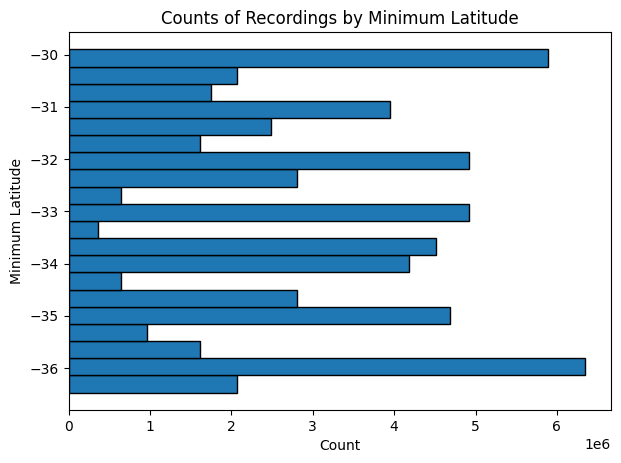

In [13]:
plt.figure(figsize=(7, 5), dpi=100)
plt.title('Counts of Recordings by Minimum Latitude')
plt.xlabel('Count')
plt.ylabel('Minimum Latitude')
plt.hist(df_baseline['lat_min'], bins = 20, 
         stacked=True, orientation='horizontal', ec='black')

#### Counts of Different Models

In [14]:
%%time
model_valuecount = df_baseline['model'].value_counts()
model_valuecount

CPU times: total: 4.03 s
Wall time: 4.43 s


data\MPI-ESM1-2-HR       5154240
data\TaiESM1             3541230
data\NorESM2-MM          3541230
data\CMCC-CM2-HR4        3541230
data\CMCC-CM2-SR5        3541230
data\CMCC-ESM2           3541230
data\SAM0-UNICON         3541153
data\FGOALS-f3-L         3219300
data\GFDL-CM4            3219300
data\GFDL-ESM4           3219300
data\EC-Earth3-Veg-LR    3037320
data\MRI-ESM2-0          3037320
data\BCC-CSM2-MR         3035340
data\MIROC6              2070900
data\ACCESS-CM2          1932840
data\ACCESS-ESM1-5       1610700
data\INM-CM5-0           1609650
data\INM-CM4-8           1609650
data\KIOST-ESM           1287720
data\FGOALS-g3           1287720
data\MPI-ESM1-2-LR        966420
data\NESM3                966420
data\AWI-ESM-1-1-LR       966420
data\MPI-ESM-1-2-HAM      966420
data\NorESM2-LM           919800
data\BCC-ESM1             551880
data\CanESM5              551880
Name: model, dtype: int64

#### Histogram Showing the Counts of Recordings by Model Type

(array([1932840., 1610700.,  966420., 3035340.,  551880.,  551880.,
        3541230., 3541230., 3541230., 3037320., 3219300., 1287720.,
        3219300., 3219300., 1609650., 1609650., 1287720., 2070900.,
         966420., 5154240.,  966420., 3037320.,  966420.,  919800.,
        3541230., 3541153., 3541230.]),
 array([ 0.        ,  0.96296296,  1.92592593,  2.88888889,  3.85185185,
         4.81481481,  5.77777778,  6.74074074,  7.7037037 ,  8.66666667,
         9.62962963, 10.59259259, 11.55555556, 12.51851852, 13.48148148,
        14.44444444, 15.40740741, 16.37037037, 17.33333333, 18.2962963 ,
        19.25925926, 20.22222222, 21.18518519, 22.14814815, 23.11111111,
        24.07407407, 25.03703704, 26.        ]),
 <BarContainer object of 27 artists>)

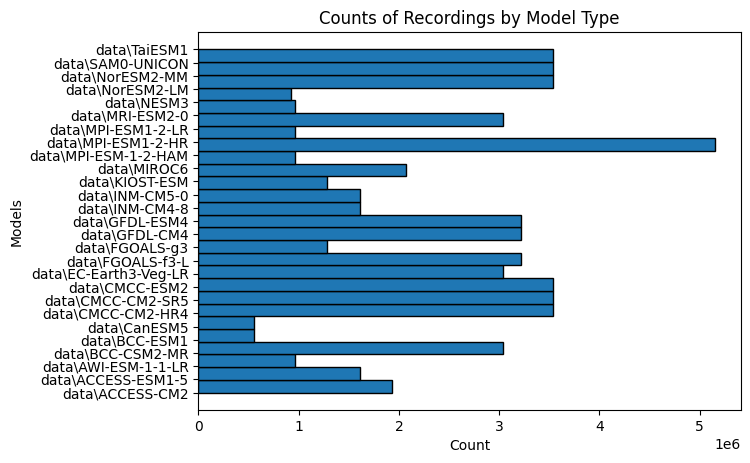

In [15]:
plt.figure(figsize=(7, 5), dpi=100)
plt.title('Counts of Recordings by Model Type')
plt.xlabel('Count')
plt.ylabel('Models')
plt.hist(df_baseline['model'], bins=len(model_valuecount), 
         stacked=True, orientation='horizontal', ec='black')

#### Run times comparison for baseline data loading and EDA

| Team Member | OS  | RAM | Processor        | Is SSD | Time (loading) |  Time (EDA numeric column)| Time (EDA categorical column)|
|-------------|--------------|-----|------------------|--------|-----------------|------|------|
| Nikita      | Windows 10 | 16GB | 4th Gen Core i7  | Yes    | 1min 55s     |1.06s      |5.23s       |
| Margot      |   Windows 10   | 12GB | 10th Gen-Core i7 | Yes  |   1min 25s   | 923 ms  | 4.43 s  |
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |   1 min 13s  | 850ms |4.23s|
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip            |    Yes    |   1min 3s | 585ms  |  3.36s |

## Investigating approaches to reduce memory usage.

### 1. Changing `dtype` of data

#### Data Loading and Set `dtype`

In [23]:
%%time
dtype_columns = {"lat_min": 'float16',
                 "lat_max": 'float16',
                 "lon_min": 'float16', 
                 "lon_max": 'float16', 
                 "rain (mm/day)": 'float16',
                 "model": 'str'
                }
df_dtype = pd.read_csv(os.path.join(output_directory, "combined_csv.csv"), index_col=0, 
                   parse_dates=True, dtype=dtype_columns)

CPU times: total: 2min 34s
Wall time: 2min 41s


#### EDA

### Structure of the Data

In [24]:
# check dtype and memory usage
df_dtype.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float16
 1   lat_max        float16
 2   lon_min        float16
 3   lon_max        float16
 4   rain (mm/day)  float16
 5   model          object 
dtypes: float16(5), object(1)
memory usage: 1.5+ GB


In [25]:
df_dtype.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,0.000000,data\ACCESS-CM2
1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000,data\ACCESS-CM2
1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000,data\ACCESS-CM2
1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000,data\ACCESS-CM2
1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,0.010475,data\ACCESS-CM2


#### Counts of a Numeric Column

In [28]:
%%time
df_dtype['lat_min'].value_counts()

CPU times: total: 1.17 s
Wall time: 1.24 s


-33.93750    3035329
-30.15625    3035329
-31.09375    3035329
-32.03125    3035329
-32.96875    3035329
              ...   
-30.37500     321930
-32.40625     321930
-34.43750     321930
-34.09375     229950
-30.31250     229950
Name: lat_min, Length: 61, dtype: int64

#### Counts of Different Models

In [29]:
%%time
df_dtype['model'].value_counts()

CPU times: total: 5.47 s
Wall time: 5.96 s


data\MPI-ESM1-2-HR       5154240
data\TaiESM1             3541230
data\NorESM2-MM          3541230
data\CMCC-CM2-HR4        3541230
data\CMCC-CM2-SR5        3541230
data\CMCC-ESM2           3541230
data\SAM0-UNICON         3541153
data\FGOALS-f3-L         3219300
data\GFDL-CM4            3219300
data\GFDL-ESM4           3219300
data\EC-Earth3-Veg-LR    3037320
data\MRI-ESM2-0          3037320
data\BCC-CSM2-MR         3035340
data\MIROC6              2070900
data\ACCESS-CM2          1932840
data\ACCESS-ESM1-5       1610700
data\INM-CM5-0           1609650
data\INM-CM4-8           1609650
data\KIOST-ESM           1287720
data\FGOALS-g3           1287720
data\MPI-ESM1-2-LR        966420
data\NESM3                966420
data\AWI-ESM-1-1-LR       966420
data\MPI-ESM-1-2-HAM      966420
data\NorESM2-LM           919800
data\BCC-ESM1             551880
data\CanESM5              551880
Name: model, dtype: int64

#### Run times comparison for data loading with changed dtype and EDA

| Team Member | OS  | RAM | Processor        | Is SSD | Time (loading) |  Time (EDA numeric column)| Time (EDA categorical column)|
|-------------|--------------|-----|------------------|--------|-----------------|------|------|
| Nikita      | Windows 10 | 16GB | 4th Gen Core i7  | Yes    | 2min 19s     |1.14s      |5.45s       |
| Margot      |   Windows 10   | 12GB | 10th Gen-Core i7 | Yes   |  2min 41s  | 1.24 s  | 5.96 s  |
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |   1 min 1s  | 706ms |3.58s|
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip            |    Yes    |     1min 7s       |  1.03s | 3.24s  |

### 2. Load just columns we want

#### Select Columns and Load Data

In [30]:
%%time
# Only select 1 numeric column and 1 string type column

cols = ["lat_min", "model"]
df_selected_cols = pd.read_csv(os.path.join(output_directory, "combined_csv.csv"), 
                   parse_dates=True, usecols=cols)

CPU times: total: 51.2 s
Wall time: 55.2 s


#### EDA

#### Structure of the Data

In [31]:
# check dtype and memory usage
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62467843 entries, 0 to 62467842
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   lat_min  float64
 1   model    object 
dtypes: float64(1), object(1)
memory usage: 953.2+ MB


In [32]:
df_selected_cols.head()

,lat_min,model
0,-36.25,data\ACCESS-CM2
1,-36.25,data\ACCESS-CM2
2,-36.25,data\ACCESS-CM2
3,-36.25,data\ACCESS-CM2
4,-36.25,data\ACCESS-CM2


#### Counts of a Numeric Column

In [33]:
%%time
df_selected_cols['lat_min'].value_counts()

CPU times: total: 719 ms
Wall time: 694 ms


-34.869110    3035329
-32.984293    3035329
-32.041885    3035329
-31.099476    3035329
-30.000000    1747830
               ...   
-30.700015     183960
-30.696652     183960
-33.487232     183960
-36.277805     183960
-36.281964     183960
Name: lat_min, Length: 84, dtype: int64

#### Counts of Different Models

In [34]:
%%time
df_selected_cols['model'].value_counts()

CPU times: total: 4 s
Wall time: 4.19 s


data\MPI-ESM1-2-HR       5154240
data\TaiESM1             3541230
data\NorESM2-MM          3541230
data\CMCC-CM2-HR4        3541230
data\CMCC-CM2-SR5        3541230
data\CMCC-ESM2           3541230
data\SAM0-UNICON         3541153
data\FGOALS-f3-L         3219300
data\GFDL-CM4            3219300
data\GFDL-ESM4           3219300
data\EC-Earth3-Veg-LR    3037320
data\MRI-ESM2-0          3037320
data\BCC-CSM2-MR         3035340
data\MIROC6              2070900
data\ACCESS-CM2          1932840
data\ACCESS-ESM1-5       1610700
data\INM-CM5-0           1609650
data\INM-CM4-8           1609650
data\KIOST-ESM           1287720
data\FGOALS-g3           1287720
data\MPI-ESM1-2-LR        966420
data\NESM3                966420
data\AWI-ESM-1-1-LR       966420
data\MPI-ESM-1-2-HAM      966420
data\NorESM2-LM           919800
data\BCC-ESM1             551880
data\CanESM5              551880
Name: model, dtype: int64

#### Run times comparison for data loading with only selected columns and EDA

| Team Member | OS  | RAM | Processor        | Is SSD | Time (loading) |  Time (EDA numeric column)| Time (EDA categorical column)|
|-------------|--------------|-----|------------------|--------|-----------------|------|------|
| Nikita      | Windows 10 | 16GB | 4th Gen Core i7  | Yes    | 51s     |808ms      |4.65s       |
| Margot      |   Windows 10   | 12GB | 10th Gen-Core i7 | Yes   |  55.2s   | 694ms  |4.19s  |
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |   26.4s  | 640ms |3.16s|
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip            |    Yes    |      30.3s      |  572ms |  3.5s |

### 3. Load in chunks

#### EDA

#### Counts of a Numeric Column

In [35]:
%%time

counts = pd.Series(dtype=int)
for chunk in pd.read_csv(os.path.join(output_directory, "combined_csv.csv"), chunksize=100_000):
    counts = counts.add(chunk["model"].value_counts(), fill_value=0)
print(counts.astype(int))

data\ACCESS-CM2          1932840
data\ACCESS-ESM1-5       1610700
data\AWI-ESM-1-1-LR       966420
data\BCC-CSM2-MR         3035340
data\BCC-ESM1             551880
data\CMCC-CM2-HR4        3541230
data\CMCC-CM2-SR5        3541230
data\CMCC-ESM2           3541230
data\CanESM5              551880
data\EC-Earth3-Veg-LR    3037320
data\FGOALS-f3-L         3219300
data\FGOALS-g3           1287720
data\GFDL-CM4            3219300
data\GFDL-ESM4           3219300
data\INM-CM4-8           1609650
data\INM-CM5-0           1609650
data\KIOST-ESM           1287720
data\MIROC6              2070900
data\MPI-ESM-1-2-HAM      966420
data\MPI-ESM1-2-HR       5154240
data\MPI-ESM1-2-LR        966420
data\MRI-ESM2-0          3037320
data\NESM3                966420
data\NorESM2-LM           919800
data\NorESM2-MM          3541230
data\SAM0-UNICON         3541153
data\TaiESM1             3541230
dtype: int32
CPU times: total: 2min 16s
Wall time: 2min 21s


#### Counts of Different Models

In [36]:
%%time

counts = pd.Series(dtype=int)
for chunk in pd.read_csv(os.path.join(output_directory, "combined_csv.csv"), chunksize=100_000):
    counts = counts.add(chunk["lat_min"].value_counts(), fill_value=0)
print(counts.astype(int))

-36.467390     644280
-36.455696     321930
-36.420966     414180
-36.281964     183960
-36.277805     183960
               ...   
-30.157068    1011769
-30.157068    1517670
-30.000000    1747830
-29.921967     644280
-29.900000     459900
Length: 84, dtype: int32
CPU times: total: 1min 57s
Wall time: 2min 1s


#### Run times comparison for data loading in chunks and EDA

| Team Member | OS  | RAM | Processor        | Is SSD |Time (loading & EDA numeric column)| Time (loading & EDA categorical column)|
|-------------|--------------|-----|------------------|--------|-----------------|------|
| Nikita      | Windows 10 | 16GB | 4th Gen Core i7  | Yes    | 1m 57s     | 1min 53s     |
| Margot      |    Windows 10   | 12GB | 10th Gen-Core i7 | Yes     |  2min 21s               | 2min 1s  |
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |  50.8s | 49.3s |
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip            |    Yes    |     55s       |  53.2 |

### 4. Dask

#### Loading the Data as Dask Data Frame

In [48]:
%%time
df_dask = dd.read_csv(os.path.join(output_directory, "combined_csv.csv"))

CPU times: total: 15.6 ms
Wall time: 17.7 ms


### EDA

#### Structure of the Data

In [38]:
# check dtype
df_dask.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 7 entries, time to model
dtypes: object(2), float64(5)

In [39]:
# memory usage by column (unit: bytes)
mem_col = df_dask.memory_usage(deep=True).compute()
mem_col

Index                 12672
lat_max           499742744
lat_min           499742744
lon_max           499742744
lon_min           499742744
model            4526268529
rain (mm/day)     499742744
time             4735966588
dtype: int64

In [40]:
# memory usage by column (unit: GB)
round(mem_col/10**9, 2)

Index            0.00
lat_max          0.50
lat_min          0.50
lon_max          0.50
lon_min          0.50
model            4.53
rain (mm/day)    0.50
time             4.74
dtype: float64

In [41]:
# memory usage by partition
mem_par = df_dask.memory_usage_per_partition(deep=True).compute()
mem_par

0     146217128
1     146873812
2     140466123
3     135300899
4     127924586
        ...    
94    110444943
95    110979593
96    111742718
97    111165333
98    111045083
Length: 99, dtype: int64

In [42]:
print(f"Total memory usage {round(mem_par.sum()/10**9, 1)}GB")

Total memory usage 11.8GB


In [43]:
df_dask.head()

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,data\ACCESS-CM2
1,1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,data\ACCESS-CM2
2,1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,data\ACCESS-CM2
3,1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,data\ACCESS-CM2
4,1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,data\ACCESS-CM2


#### Counts of a Numeric Column

In [44]:
%%time
df_dask['lat_min'].value_counts().compute()

CPU times: total: 2min 14s
Wall time: 37.4 s


-31.099476    3035329
-32.984293    3035329
-34.869110    3035329
-32.041885    3035329
-30.000000    1747830
               ...   
-30.696652     183960
-36.277805     183960
-36.281964     183960
-30.700015     183960
-33.487232     183960
Name: lat_min, Length: 84, dtype: int64

#### Counts of Different Models

In [45]:
%%time
df_dask['model'].value_counts().compute()

CPU times: total: 1min 50s
Wall time: 41.6 s


data\MPI-ESM1-2-HR       5154240
data\TaiESM1             3541230
data\NorESM2-MM          3541230
data\CMCC-CM2-HR4        3541230
data\CMCC-CM2-SR5        3541230
data\CMCC-ESM2           3541230
data\SAM0-UNICON         3541153
data\FGOALS-f3-L         3219300
data\GFDL-CM4            3219300
data\GFDL-ESM4           3219300
data\EC-Earth3-Veg-LR    3037320
data\MRI-ESM2-0          3037320
data\BCC-CSM2-MR         3035340
data\MIROC6              2070900
data\ACCESS-CM2          1932840
data\ACCESS-ESM1-5       1610700
data\INM-CM5-0           1609650
data\INM-CM4-8           1609650
data\KIOST-ESM           1287720
data\FGOALS-g3           1287720
data\MPI-ESM1-2-LR        966420
data\NESM3                966420
data\AWI-ESM-1-1-LR       966420
data\MPI-ESM-1-2-HAM      966420
data\NorESM2-LM           919800
data\BCC-ESM1             551880
data\CanESM5              551880
Name: model, dtype: int64

#### Run times comparison for data loading with Dask and EDA

| Team Member | OS  | RAM | Processor        | Is SSD | Time (loading) |  Time (EDA numeric column)| Time (EDA categorical column)|
|-------------|--------------|-----|------------------|--------|-----------------|------|------|
| Nikita      | Ubuntu 20.04 | 8GB | 8th Gen Core i7  | Yes    | 20.5ms     | 21s     |28s       |
| Margot      |   Windows 10   | 12GB | 10th Gen-Core i7 | Yes    |  192 ms               | 37.4 s  | 41.6 s  |
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |   27.3ms  | 7.87s |12.3s|
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip            |    Yes    |    66.4ms        | 10.1s  |  15.4s |

### Summary of Different Methods to Reduce Memory Usage and Run Times

- The memory usage with baseline method (load the whole combined CSV file with `pandas.read_csv` ) is 3.3+ GB. The memory loading time is the highest among all methods. 
- Changing the data type of numeric columns to `dtype` with smaller memory usage can reduce half of the memory in this case. However the run time for loading and EDA on numeric and categorical columns only slightly decreased. But, we will compromise the precision on data.
- Load only selected columns could largely decrease the memory usage and loading time, however only slightly decrease the run time for those selected columns.
- Loading and processing data in chunks can decrease the overall run time compare with the baseline. It could be considered as an alternative to the baseline method.
- The highest memory usage among all four methods is 11.4 GB with Dask Dataframe. However, the the loading time is at the lower side compared with baseline. The reason is that it c

## EDA for R

In [49]:
%load_ext rpy2.ipython

R[write to console]: Error: package or namespace load failed for 'tools' in inDL(x, as.logical(local), as.logical(now), ...):
 unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.


R[write to console]: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'tools' was built under R version 4.1.1 



RRuntimeError: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.


**In order to select which method is the most appropriate to transfer the dataframe from python to R, we chose to try all methods and observe which method was more suitable for us (the code and output of the methods that were not selected are placed in markdown cells):**

### Parquet Method

```
%%time
df.to_parquet("../data/rainfall.parquet")

>>> CPU times: user 22.3 s, sys: 5.77 s, total: 28.1 s
Wall time: 30.1 s
```
<br/><br/>

```
%%time
%%R
library(dplyr)
library(arrow)
parquet_rdf <- read_parquet("../data/rainfall.parquet") |> collect()

>>> CPU times: user 4.42 s, sys: 4.37 s, total: 8.8 s
Wall time: 8.37 s
```

### Feather Method

```
%%time
import pyarrow.feather as feather
feather.write_feather(df, '../data/rainfall.feather')

>>> CPU times: user 4.5 s, sys: 4.45 s, total: 8.95 s
Wall time: 6.89 s
```
<br/><br/>

```
%%time
%%R
feather_rdf <- read_feather("../data/rainfall.feather") |> collect()

>>> CPU times: user 1.09 s, sys: 1.84 s, total: 2.93 s
Wall time: 4.31 s
```

### Arrow Exchange Method

In [46]:
import rpy2.robjects.conversion
import pyarrow
import rpy2.rinterface
import rpy2_arrow.pyarrow_rarrow as pyra
from rpy2.robjects.packages import importr


R[write to console]: Error: package or namespace load failed for 'tools' in inDL(x, as.logical(local), as.logical(now), ...):
 unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.


R[write to console]: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'tools' was built under R version 4.1.1 



RRuntimeError: Error in inDL(x, as.logical(local), as.logical(now), ...) : 
  unable to load shared object 'C:/Program Files/R/R-4.1.1/library/tools/libs/x64/tools.dll':
  LoadLibrary failure:  The specified procedure could not be found.


In [47]:
%%time
arrow_rframe = pyra.converter.py2rpy(pyarrow.Table.from_pandas(df))

NameError: name 'pyra' is not defined

In [40]:
%%time
%%R -i arrow_rframe
library(dplyr)
arrow_rframe <- arrow_rframe |> collect()

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




CPU times: user 180 ms, sys: 87.1 ms, total: 268 ms
Wall time: 515 ms


### Checking size of different files

In [48]:
os.path.getsize("../data/combined_csv.csv")*1e-6

5970.596176999999

In [49]:
os.path.getsize("../data/rainfall.feather")*1e-6

716.238154

In [50]:
os.path.getsize("../data/rainfall.parquet")*1e-6

701.2660629999999

**Summary of different transfer methods:**


| Method | Estimated Wall Time | File memory |
| --- | --- | --- |
| Arrow Exchange | 9s | 5.98 GB |
| Feather file | 11s | 716 MB |
| Parquet file | 38s | 701 MB |

> Note: Wall times of different transfer methods were estimated using a Apple M1 chip MacOS Big Sur with 8GB of RAM

**Justification:** The 'Arrow Exchange' method appeared to speed up the conversion of a pandas DataFrame into tabular data that is accessible for R. We opted for this method since it decreases the time spent during the serialization and de-serialization process while also avoiding the creation of unnecessary copies of the data. The ability to process data in parallel and its efficient serialization process makes the 'Arrow Exchange' method a much better option than the Pandas Exchange method (which is not shown here). The file storage format appears to be much more memory-intensive compared to the other file storage formats. If we are concerned about storage space, we might want to consider a different method that saves memory. However, for our purposes the 'Arrow Exchange' method is fine and provides a level of flexibility to be able to work with complex data on any computer program.

### EDA

**Structure of the Data:**

In [44]:
%%R
str(arrow_rframe)

tibble [62,467,843 × 7] (S3: tbl_df/tbl/data.frame)
 $ lat_min      : num [1:62467843] -35.4 -35.4 -35.4 -35.4 -35.4 ...
 $ lat_max      : num [1:62467843] -33.6 -33.6 -33.6 -33.6 -33.6 ...
 $ lon_min      : num [1:62467843] 142 142 142 142 142 ...
 $ lon_max      : num [1:62467843] 143 143 143 143 143 ...
 $ rain (mm/day): num [1:62467843] 4.24e-13 4.22e-13 4.50e-13 4.25e-13 4.27e-13 ...
 $ model        : chr [1:62467843] "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" ...
 $ time         : chr [1:62467843] "1889-01-01 12:00:00" "1889-01-02 12:00:00" "1889-01-03 12:00:00" "1889-01-04 12:00:00" ...


**Summary Statistics For Each Columns**

In [45]:
%%R
arrow_rframe |> summary()

    lat_min           lat_max          lon_min           lon_max     
 Min.   :-36       Min.   :-36.00   Min.   :141       Min.   :141.2  
 1st Qu.:-35       1st Qu.:-33.66   1st Qu.:143       1st Qu.:145.0  
 Median :-33       Median :-32.04   Median :147       Median :148.1  
 Mean   :-33       Mean   :-31.98   Mean   :147       Mean   :148.2  
 3rd Qu.:-31       3rd Qu.:-30.16   3rd Qu.:150       3rd Qu.:151.3  
 Max.   :-30       Max.   :-27.91   Max.   :154       Max.   :155.6  
 NA's   :3219300                    NA's   :3219300                  
 rain (mm/day)        model               time          
 Min.   :  0       Length:62467843    Length:62467843   
 1st Qu.:  0       Class :character   Class :character  
 Median :  0       Mode  :character   Mode  :character  
 Mean   :  2                                            
 3rd Qu.:  1                                            
 Max.   :433                                            
 NA's   :3219300                         

**Mean Rainfall (mm/day) Computed For Each Model**

In [55]:
%%R
library(dplyr)
library(ggplot2)
mean_rainfall_df <- arrow_rframe |> group_by(model) |> summarize(mean_rainfall = mean(`rain (mm/day)`)) |> arrange(desc(mean_rainfall))
mean_rainfall

# A tibble: 27 × 2
   model         mean_rainfall
   <chr>                 <dbl>
 1 INM-CM4-8              2.81
 2 INM-CM5-0              2.67
 3 CMCC-CM2-SR5           2.38
 4 MIROC6                 2.30
 5 CMCC-CM2-HR4           2.28
 6 CMCC-ESM2              2.27
 7 NorESM2-MM             2.23
 8 NorESM2-LM             2.23
 9 TaiESM1                2.22
10 ACCESS-ESM1-5          2.22
# … with 17 more rows


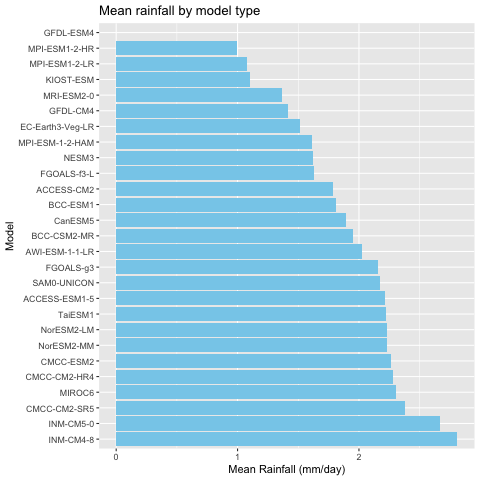

In [56]:
%%R
mean_rainfall_df |> ggplot() +
    aes(x = mean_rainfall, y = reorder(model, -mean_rainfall)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    labs(x = "Mean Rainfall (mm/day)", y = "Model", title = "Mean rainfall by model type")

**Counts of Different Models:**

In [59]:
%%time
%%R
model_counts_df <- arrow_rframe |> count(model) |> arrange(desc(n))
model_counts_df

# A tibble: 27 × 2
   model               n
   <chr>           <int>
 1 MPI-ESM1-2-HR 5154240
 2 CMCC-CM2-HR4  3541230
 3 CMCC-CM2-SR5  3541230
 4 CMCC-ESM2     3541230
 5 NorESM2-MM    3541230
 6 TaiESM1       3541230
 7 SAM0-UNICON   3541153
 8 FGOALS-f3-L   3219300
 9 GFDL-CM4      3219300
10 GFDL-ESM4     3219300
# … with 17 more rows
CPU times: user 986 ms, sys: 590 ms, total: 1.58 s
Wall time: 1.98 s


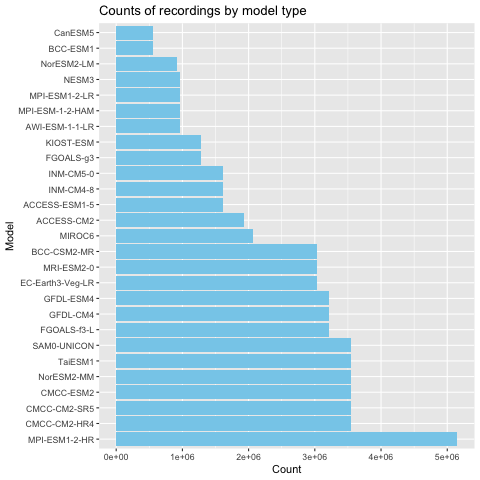

In [60]:
%%R
model_counts_df |> ggplot() +
    geom_bar(aes(x = n, y = reorder(model, -n)), stat="identity", fill = "skyblue") +
    labs(x = "Count", y = "Model", title = "Counts of recordings by model type")

**Here is a summary of the time taken to obtain the model counts using the Arrow Exchange Method:**

| Team Member | OS  | RAM | Processor        | Is SSD | Time |
|-------------|--------------|-----|------------------|--------|------|
| Nikita      | Ubuntu 20.04 | 8GB | 8th Gen Core i7  | Yes    |  
| Margot      |  Windows 10   | 12GB | 10th Gen-Core i7 | Yes   |  |   
| Thea Wenxin |   MacOS Monterey |  16GB   |   Apple M1 chip |  Yes    |  
| Kiran       |    MacOS Big Sur          |   8GB  |     Apple M1 chip |    Yes    |  1.98s |